# Séries temporais no Pandas
Qualquer conjunto de dados em que os valores são medidos em diferentes pontos no tempo. Muitas séries temporais são espaçadas uniformemente em uma frequência específica, por exemplo, medições meteorológicas horárias, contagens diárias de visitas a sites ou totais de vendas mensais. As séries temporais também podem ser espaçadas irregularmente e esporádicas, por exemplo, dados com timestamp de data e hora no log de eventos de um sistema de computador ou um histórico de chamadas de emergência 911. As ferramentas de série temporal do Pandas se aplicam igualmente bem a qualquer tipo de série temporal.<br>

## Bibliotecas
* Pandas
* Matplotlib [pylot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* Matplotlib [dates](https://matplotlib.org/stable/api/dates_api.html)
* [Seaborn](https://seaborn.pydata.org/generated/seaborn.set_style.html)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Tratamento de datas
import matplotlib.dates as mdates

# Estilo seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

# Parte 1 - Conceitos

### Estruturas de dados de série temporal
Cada instante de tempo é representado por um *timestamp* (rótulo de tempo), que é uma variável do [tipo *datetime*](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).<br>
A estrutura *datetime* tem o formato aaaa-mm-dd hh:mm:ss.<br><br>

A função *to_datetime()* converte strings com informação de tempo em *timestamps*.<br>
Aceita como agumento diversos formatos de data e hora.<br>
Infere automaticamente um formato de data/hora com base na entrada.<br><br>

#### Exemplo
Converter as seguintes strings em *timestamps*:
* 2018-01-15 3:45pm
* 7/8/2021<br>

In [3]:
# Data e hora no formato: aaaa-mm-dd hh:mm am-pm
print(pd.to_datetime('2018-01-15 3:45pm'))

2018-01-15 15:45:00


No segundo exemplo exemplo a data é ambígua, já que tanto 7 quanto 8 podem estar representando o dia ou o mês.<br>
A função *to_datetime* entende '7/8/1952' como mês/dia/ano (default), interpretando a data no string como 8 de julho de 2021.<br>

In [4]:
# Data e hora no formato ambíguo (8 de julho de 1952)
# Assume mm/dd/aaaa
pd.to_datetime('7/8/2021')

Timestamp('2021-07-08 00:00:00')

Podemos usar o parâmetro *dayfirst* para definir a data como 7 de agosto 2021.<br>

In [5]:
# Informa que o dia vem primeiro
# Assume dd/mm/aaaa
pd.to_datetime('7/8/2021', dayfirst=True)

Timestamp('2021-08-07 00:00:00')

In [6]:
# Não é mais ambíguo porque 17 não pode ser mês
# Assume dd/mm/aaaa
pd.to_datetime('17/8/2021')

/var/folders/z2/ty5fbwrd3hq2h5tztl9jzys00000gn/T/ipykernel_22740/3685305644.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime('17/8/2021')


Timestamp('2021-08-17 00:00:00')

### DatetimeIndex
Se fornecermos uma lista ou matriz de strings como entrada para a função *to_datetime*, ela retornará uma sequência de valores de data e hora em um objeto do tipo *DatetimeIndex*, a estrutura de dados principal de séries temporais do pandas.<br>

No exemplo a seguir podemos ver que a estrutura *DatetimeIndex* armazena os valores no tipo de dados *datetime64[ns]*, o que indica que os dados são armazenados como inteiros de 64 bits, em unidades de nanossegundos (ns).<br>

Essa forma de armazenamento permite que os *DatetimeIndex* armazenem grandes sequências de valores de data e hora de forma compacta, e executem operações vetorizadas com eficiência usando matrizes *NumPy datetime64*.

In [7]:
pd.to_datetime(['2018-01-05', '7/8/2021', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '2021-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

## Formatar datas e horas em string
O parâmetro *format* da função *to_datetime* permite especificar o formato das datas e horas que estão armazenadas em strings. Isso é importante ao tratar sequências de strings porque acelera bastante o desempenho da função em comparação com o comportamento padrão, onde cada formato é inferido separadamente para cada string individual.<br><br>
Exemplo:<br>
Usar os códigos de formato %m (mês numérico), %d (dia do mês) e %y (ano de 2 dígitos) para especificar o formato.

In [8]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

## Carregar os dados
* Leitura do arquivo *requisicoes_dia.csv*
* Mostrar o *shape* do dataframe
* Mostrar 3 primeiras linhas
* Mostrar 3 última linhas
* Mostrar o tipo de cada coluna
* Fazer a coluna Data ser o índice do dataframe
* Mostrar as 3 primeiras linhas
* Mostrar o índice

In [9]:
req_dia = pd.read_csv("requisicoes_dia.csv")
print(req_dia.shape)

(4383, 4)


In [10]:
req_dia.head(3)

,Data,WEB,BD,APLIC
0,2006-01-01,1069.184,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN


In [11]:
req_dia.tail(3)

,Data,WEB,BD,APLIC
4380,2017-12-29,1295.08753,584.277,29.854
4381,2017-12-30,1215.44897,721.247,7.467
4382,2017-12-31,1107.11488,721.176,19.980


In [12]:
req_dia.dtypes

Data      object
WEB      float64
BD       float64
APLIC    float64
dtype: object

In [13]:
req_dia = req_dia.set_index('Data')
req_dia.head(3)

,WEB,BD,APLIC
Data,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN


In [14]:
req_dia.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Data', length=4383)

## Definir o índice no comando read
Podemos consolidar a transformação do índice em uma única linha, usando os parâmetros index_col e parse_dates da função read_csv().

In [15]:
req_dia = pd.read_csv('requisicoes_dia.csv', index_col=0, parse_dates=True)
print(req_dia.head(3))
req_dia.index

                 WEB  BD  APLIC
Data                           
2006-01-01  1069.184 NaN    NaN
2006-01-02  1380.521 NaN    NaN
2006-01-03  1442.533 NaN    NaN


DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Data', length=4383, freq=None)

## Tipo datetime
Cada valor no Datetimeindex é do tipo *datetime*.<br>
Os componentes de data e tempo individuais estão disponíveis como atributos (ano, mês, dia e assim por diante).<br><br>
Exemplo:
Adicionar colunas contendo o nome do ano, mês e dia da semana ao *dataframe*.

In [16]:
# Adicionar colunas com o ano, mes, e dia da semana
req_dia['Ano'] = req_dia.index.year
req_dia['Mes'] = req_dia.index.month
req_dia['Num dia semana'] = req_dia.index.dayofweek
nome_dia = {0:'Seg',1:'Ter',2:'Qua',3:'Qui',4:'Sex',5:'Sab',6:'Dom'}
req_dia['Dia da semana'] = req_dia['Num dia semana'].apply(lambda x: nome_dia[x])
req_dia.drop(columns=['Num dia semana'], axis=1, inplace=True)

# Mostrar cinco linhas aleatórias
req_dia.sample(5, random_state=0)

,WEB,BD,APLIC,Ano,Mes,Dia da semana
Data,,,,,,
2008-08-23,1152.011,NaN,NaN,2008,8,Sab
2013-08-08,1291.984,79.666,93.371,2013,8,Qui
2009-08-27,1281.057,NaN,NaN,2009,8,Qui
2015-10-02,1391.050,81.229,160.641,2015,10,Sex
2009-06-02,1201.522,NaN,NaN,2009,6,Ter


## Indexação baseada no tempo
Um dos recursos mais poderosos e convenientes das séries temporais do pandas é a indexação baseada no tempo, que utiliza datas e horas para organizar e acessar os dados de forma intuitiva.<br>
Podemos usar strings formatadas de data e hora para selecionar dados no dataframe com o indexador *loc*.<br>
A indexação funciona de maneira semelhante à indexação padrão com *loc*, com alguns recursos adicionais.

In [17]:
req_dia.loc['2017-08-10']

WEB              1351.491
BD                100.274
APLIC               71.16
Ano                  2017
Mes                     8
Dia da semana         Qui
Name: 2017-08-10 00:00:00, dtype: object

In [18]:
# Selecionar a faixa de dias '2014-01-20':'2014-01-22' (inclui ambos os pontos de extremidade)
req_dia.loc['2014-01-20':'2014-01-22']

,WEB,BD,APLIC,Ano,Mes,Dia da semana
Data,,,,,,
2014-01-20,1590.687,78.647,6.371,2014,1,Seg
2014-01-21,1624.806,15.643,5.835,2014,1,Ter
2014-01-22,1625.155,60.259,11.992,2014,1,Qua


## Indexação parcial
Selecionar todas as datas e horas que correspondem parcialmente a uma determinada string.<br>
Por exemplo, selecionar todas as datas e horas do mês de fevereiro de 2012.

In [19]:
req_dia.loc['2012-02']

,WEB,BD,APLIC,Ano,Mes,Dia da semana
Data,,,,,,
2012-02-01,1511.866,199.607,43.502,2012,2,Qua
2012-02-02,1563.407,73.469,44.675,2012,2,Qui
2012-02-03,1563.631,36.352,46.510,2012,2,Sex
2012-02-04,1372.614,20.551,45.225,2012,2,Sab
2012-02-05,1279.432,55.522,54.572,2012,2,Dom
2012-02-06,1574.766,34.896,55.389,2012,2,Seg
2012-02-07,1615.078,100.312,19.867,2012,2,Ter
2012-02-08,1613.774,93.763,36.930,2012,2,Qua
2012-02-09,1591.532,132.219,19.042,2012,2,Qui


# Parte 2 - Visualização

## Carregar os dados
* Leitura do arquivo *requisicoes_dia.csv*
* Definir colouna 0 como índice
* Mostrar as 3 primeiras linhas

In [20]:
req_dia = pd.read_csv('requisicoes_dia.csv', index_col=0, parse_dates=True)
print(req_dia.head(3))

                 WEB  BD  APLIC
Data                           
2006-01-01  1069.184 NaN    NaN
2006-01-02  1380.521 NaN    NaN
2006-01-03  1442.533 NaN    NaN


## Visualização da série WEB

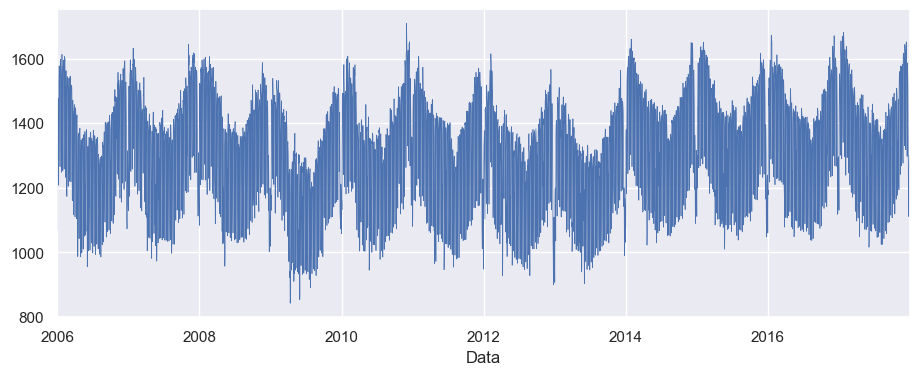

In [21]:
req_dia['WEB'].plot(linewidth=0.5);

## Séries WEB BD APLIC

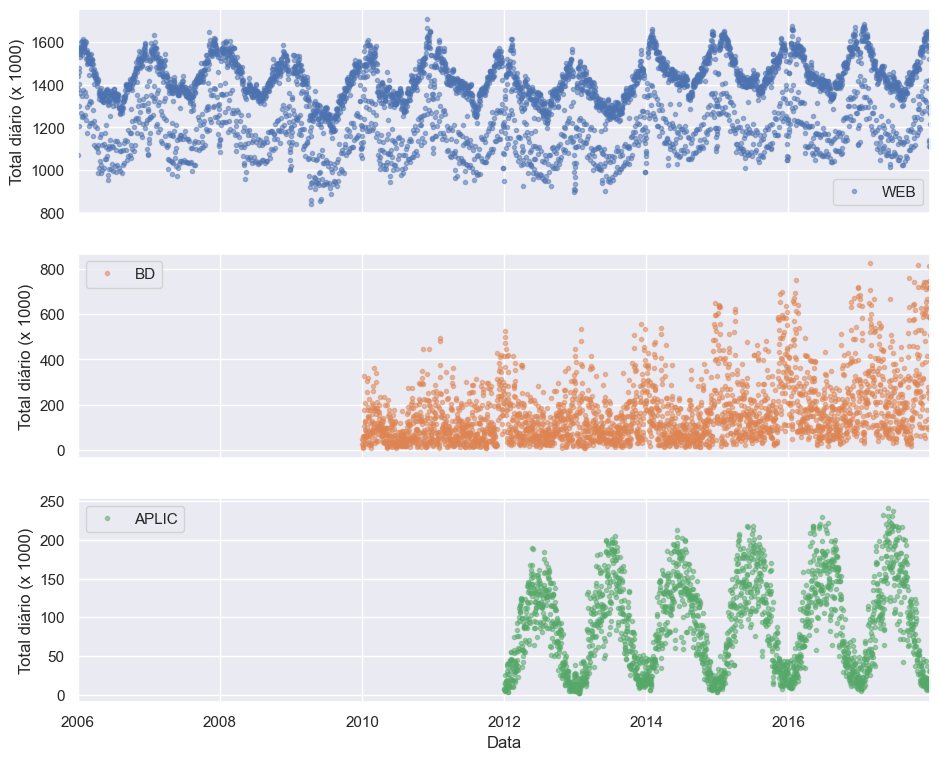

In [22]:
colunas = ['WEB', 'BD', 'APLIC']
axes = req_dia[colunas].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Total diário (x 1000)')

## Redimensionamento
O redimensionamento de uma série temporal para uma frequência mais baixa (downsampling) envolve uma operação de agregação — por exemplo, computar os totais mensais a partir de dados diários.<br>
* Usar o método *resample()* para reorganizar o DatetimeIndex agrupando os dados em intervalos de tempo mais amplos (downsampling).
* Aplicar um método de agregação como mean(), median(), sum(), etc., ao grupo de dados para cada intervalo de tempo.

Cada linha da série temporal redimensionada é rotulada com o maior valor do intervalo de tempo do intervalo.

### Redimensionamento semanal com agregação por média
Plotar as séries temporais diárias e semanais da coluna solar em um período de seis meses no mesmo gráfico.
* A agregação por média produz NaN quando algum dado do intervalo de agregação for inexistente

In [23]:
# Selecionar as colunas
colunas = ['WEB', 'BD', 'APLIC']
# Redimensionar para frequencia semanal agregando com a média
req_media_semanal = req_dia[colunas].resample('W').mean()
inicio, fim = '2017-01', '2017-02'
print(req_media_semanal.loc[inicio:fim, 'APLIC'])
print(req_dia.loc['2017-02-20':'2017-02-26', 'APLIC'])

Data
2017-01-01    31.384000
2017-01-08    14.594286
2017-01-15    13.220286
2017-01-22    33.415000
2017-01-29    43.412714
2017-02-05    30.910429
2017-02-12    37.440143
2017-02-19    75.798286
2017-02-26    53.013143
Freq: W-SUN, Name: APLIC, dtype: float64
Data
2017-02-20    31.768
2017-02-21    35.746
2017-02-22    25.278
2017-02-23    50.721
2017-02-24    70.540
2017-02-25    97.579
2017-02-26    59.460
Name: APLIC, dtype: float64


#### Observações sobre o exemplo
* O valor correspondente à media semanal em 2017-02-26 (53.013143) é o valor da média dos valores nos dias 20, 21, 22, 23, 24, 25 e 26 (31.768, 35.746, 25.278, 50.721, 70.540, 97.579, 59.460)
* Cada linha da série temporal redimensionada é rotulada com o maior valor do intervalo de tempo de cada intervalo de agregação

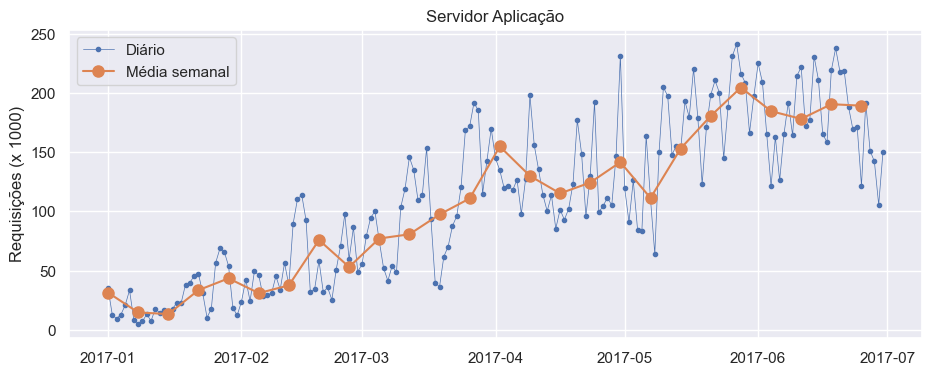

In [24]:
# Inicio e fim do período
inicio, fim = '2017-01', '2017-06'
# Plotar os dados semanal e diário no mesmo gráfico
fig, ax = plt.subplots()
ax.plot(req_dia.loc[inicio:fim, 'APLIC'],
marker='.', linestyle='-', linewidth=0.5, label='Diário')
ax.plot(req_media_semanal.loc[inicio:fim, 'APLIC'],
marker='o', markersize=8, linestyle='-', label='Média semanal')
ax.set_ylabel('Requisições (x 1000)')
ax.set_title('Servidor Aplicação')
ax.legend();

#### Redimensionamento mensal com agregação por soma
A agregação por soma retorna a saída 0 como a soma dos dados ausentes.<br>
Usamos o parâmetro min_count para alterar esse comportamento.

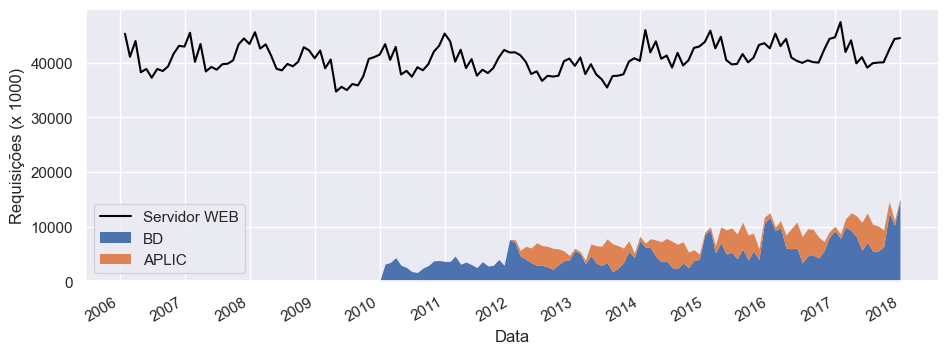

In [25]:
# Calcula as somas mensais
# Default: coloca a soma em zero para meses com valores faltantes
# min_count: coloca a soma em zero se houver menos do que min_count valores no mês
req_soma_mensal = req_dia[colunas].resample('M').sum(min_count=28)

fig, ax = plt.subplots()
ax.plot(req_soma_mensal['WEB'], color='black', label='Servidor WEB')
req_soma_mensal[['BD', 'APLIC']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Requisições (x 1000)')
ax.legend();

## Intervalos móveis
Divide os dados em intervalos móveis de tempo que podem ser agregados.<br>
Os intervalos móveis se sobrepõem e “rolam” na mesma frequência que os dados, e a série temporal transformada permanece na mesma frequência que a série temporal original.<br><br>

Usar o método rolling() para calcular a média móvel de 7 dias de nossos dados diários.<br>
Usar o argumento center=True para rotular cada janela na posição central do intervalo (4a medida da semana).<br>
As janelas rolantes são:
* 01-01-2006 a 07-01-2006 — rotulado como 04-01-2006
* 02-01-2006 a 08-01-2006 — rotulado como 05-01-2006
* 03-01-2006 a 09-01-2006 — rotulado como 06-01-2006
* e assim por diante…

In [26]:
# Calcular a média móvel de 7 dias
# O primeiro valor médio não ausente está em 04/01/2006
# Esta é a posição central do primeiro intervalo móvel
req_7d = req_dia[colunas].rolling(7, center=True).mean()
req_7d.head(10)

,WEB,BD,APLIC
Data,,,
2006-01-01,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN
2006-01-05,1381.300143,NaN,NaN
2006-01-06,1402.557571,NaN,NaN
2006-01-07,1421.754429,NaN,NaN
2006-01-08,1438.891429,NaN,NaN
2006-01-09,1449.769857,NaN,NaN


Gráfico das requisições para o Servidor de Aplicações de janeiro a junho de 2017
* Dados diários
* Dados agregados semanalmente pela média
* Média móvel de 7 dias

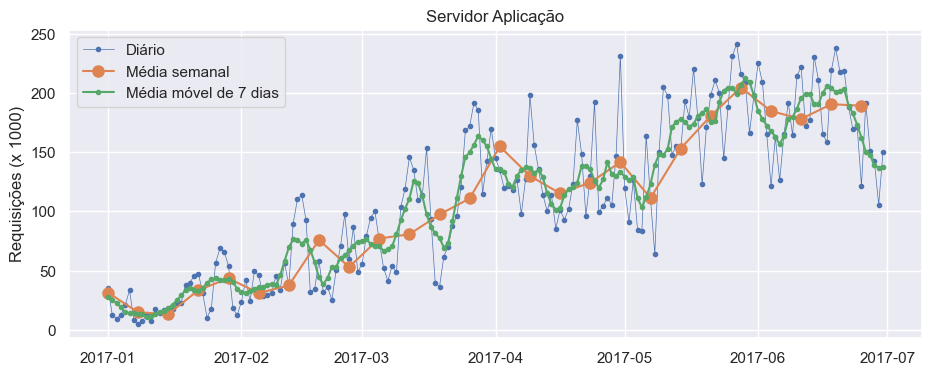

In [27]:
# Início e fim
start, end = '2017-01', '2017-06'
# Diário, agrupado pela média semanal, média móvel de sete dias
fig, ax = plt.subplots()
ax.plot(req_dia.loc[start:end, 'APLIC'],
marker='.', linestyle='-', linewidth=0.5, label='Diário')
ax.plot(req_media_semanal.loc[start:end, 'APLIC'],
marker='o', markersize=8, linestyle='-', label='Média semanal')
ax.plot(req_7d.loc[start:end, 'APLIC'],
marker='.', linestyle='-', label='Média móvel de 7 dias')
ax.set_ylabel('Requisições (x 1000)')
ax.set_title('Servidor Aplicação')
ax.legend();

# Parte 2 - Análise visual

## Séries WEB BD APLIC

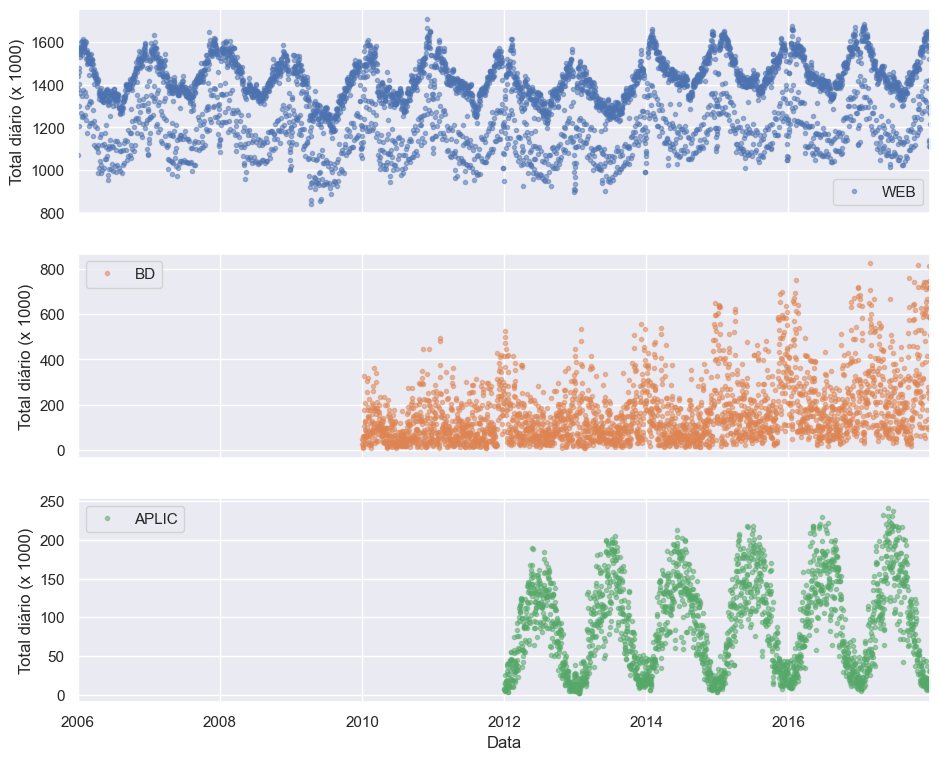

In [28]:
colunas = ['WEB', 'BD', 'APLIC']
axes = req_dia[colunas].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Total diário (x 1000)')

## Sazonalidade
Padrão que se repete em intervalos de tempo regulares.<br><br>
O gráfico anterior mostra que as três séries temporais podem exibir sazonalidade.<br>
* Oscilam entre valores altos e baixos em uma escala de tempo anual.<br>
* Sugere a existência sazonalidade em periodos menores (por exemplo, dias de semana e fins de semana).<br><br>

## Autocorrelação (dados diários)
A autocorrelação é a correlação entre uma série e ela mesma defasada no tempo (lag em inglês).<br>
Função de autocorrelação de defasagem $h$ para a série $X_{t}$ (estacionária):
* $COR(X_{t+h},X_{t})=\frac{COV(X_{t+h},X_{t})}{VAR(X_{t})}$<br><br>

A função de autocorrelação é usada para identificação de sazonalidade.<br>
Como os dados são diários, vamos avaliar a autorrelação entre dias.

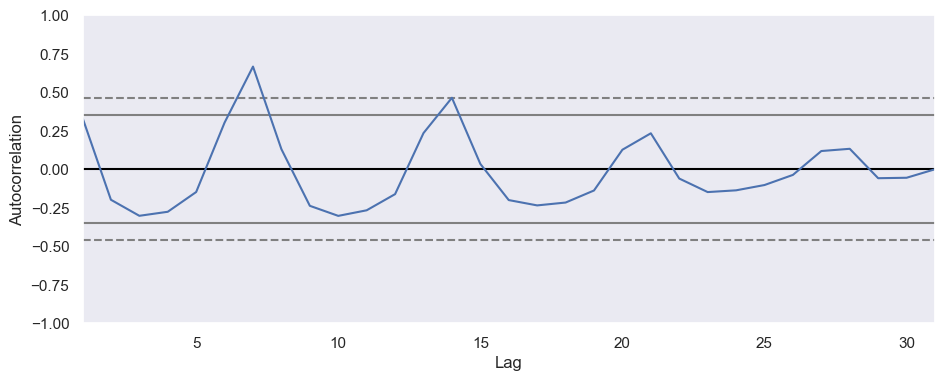

In [29]:
# Autocorrelação na série de dados do servidor WEB
# Pico de autocorrelação na defasagem de 7 dias (1 semana)
pd.plotting.autocorrelation_plot(req_dia.loc['2017-01','WEB']);

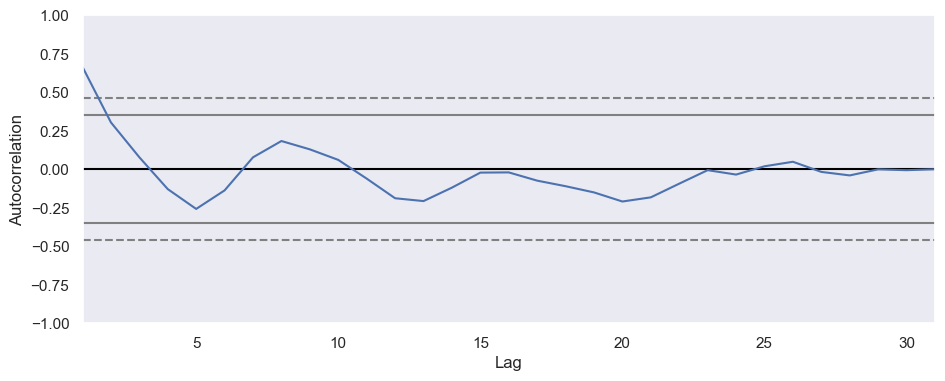

In [30]:
pd.plotting.autocorrelation_plot(req_dia.loc['2017-01','BD']);

#### Podemos observa que o pico de autocorrelação ocorre após 7 dias (1 semana).

## Visualizar sazonalidade semanal
Para visualizar a sazonalidades é necessário plotar a série temporal em períodos de tempo menores.
* Plotar a série temporal de um bimestre (Janeiro e Fevereiro de 2017)

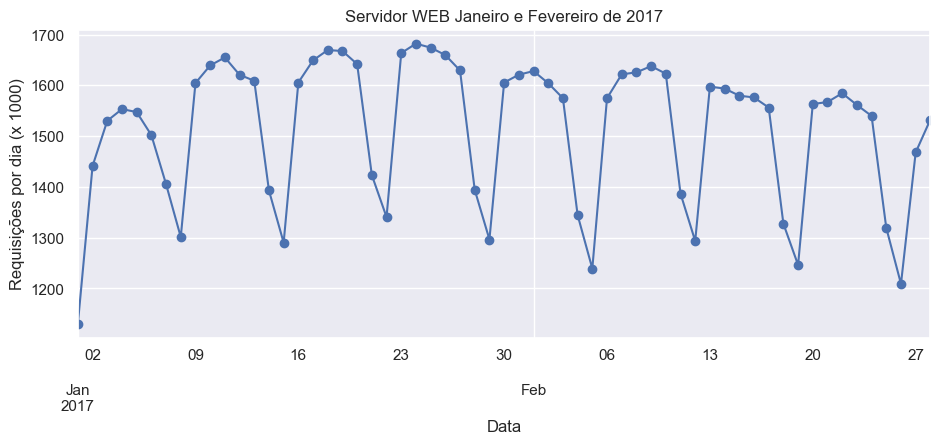

In [31]:
ax = req_dia.loc['2017-01':'2017-02', 'WEB'].plot(marker='o', linestyle='-')
ax.set_title('Servidor WEB Janeiro e Fevereiro de 2017')
ax.set_ylabel('Requisições por dia (x 1000)');

### Incluir dias da semana no gráfico
Para observar a sazonalidade semanal é importante que os dias da semana fique evidenciados no gráfico.<br>
Os ticks de data e hora são tratados de maneira diferente em matplotlib.dates em comparação com o método plot() do dataFrame.<br>
Utilizar matplotlib.dates para personalizar o gráfico.<br>
* Criar o gráfico no matplotlib
* Usar mdates.WeekdayLocator() e mdates.MONDAY para definir os ticks do eixo x para a primeira segunda-feira de cada semana
* Usar mdates.DateFormatter() para melhorar a formatação dos rótulos dos ticks.

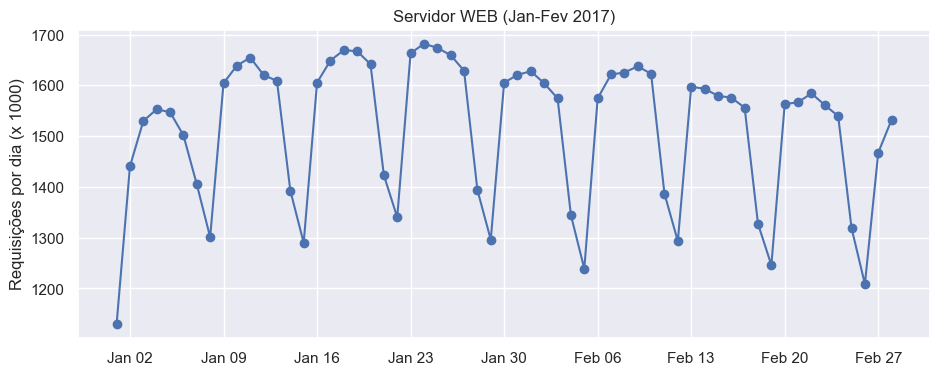

In [32]:
fig, ax = plt.subplots()
ax.plot(req_dia.loc['2017-01':'2017-02', 'WEB'], marker='o', linestyle='-')
ax.set_ylabel('Requisições por dia (x 1000)')
ax.set_title('Servidor WEB (Jan-Fev 2017)')
# Setar os ticks principais no eixo x para intervalos semanais iniciando nas segundas feiras
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Formatar rótulos dos ticks no eixo x para meses (três letras) e dias (dois dígitos)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Sazonalidade anual
Para observar a sazonalidade anual é necessário fazer uma agregação mensal dos dados<br>

### Redimensionamento mensal com agregação por média

In [33]:
# Selecionar as colunas
colunas = ['WEB', 'BD', 'APLIC']
# Redimensionar para frequencia semanal agregando com a média
req_media_mensal = req_dia[colunas].resample('M').mean()

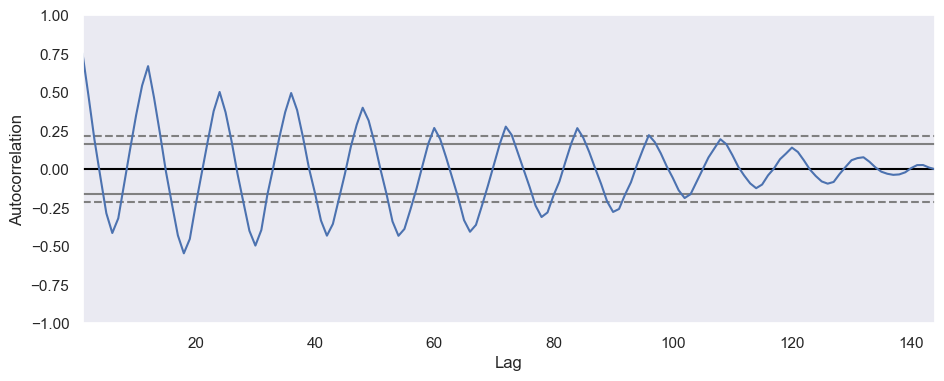

In [34]:
pd.plotting.autocorrelation_plot(req_media_mensal['WEB']);

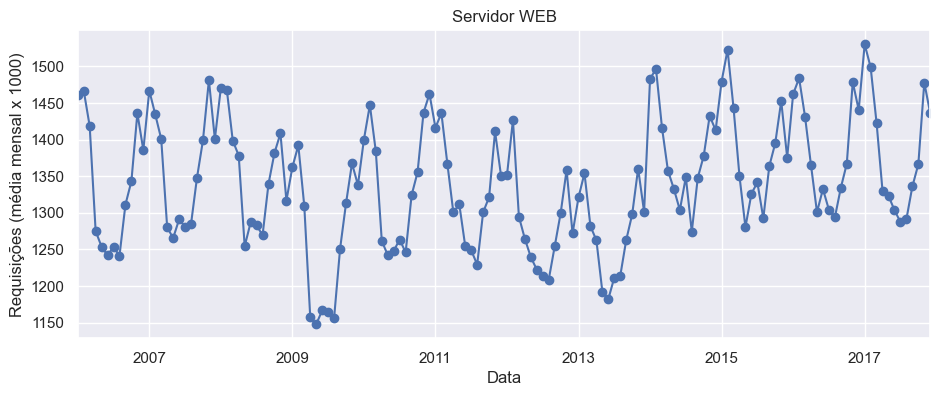

In [35]:
ax = req_media_mensal['WEB'].plot(marker='o', linestyle='-')
ax.set_title('Servidor WEB')
ax.set_ylabel('Requisições (média mensal x 1000)');

# Entrega
Imprimir para pdf.
Fazer uplod no AVA.